In [12]:
#Importing the necessary libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
dataset=pd.read_csv("forestfires.csv")
dataset.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [3]:
dataset.shape

(517, 31)

In [4]:
#Drop unwanted extra columns
dataset=dataset.drop(dataset.columns[11:30],axis=1)

In [7]:
#Check for duplicates
dataset.duplicated().sum()

8

In [9]:
#Drop duplicates
dataset=dataset.drop_duplicates()

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    object 
 1   day            509 non-null    object 
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  size_category  509 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 51.7+ KB


In [11]:
dataset.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000



* Area: The data is highly skewed with a huge kurtosis. The majority of the forest fires do not cover a large area, most of the damaged area is under 50 hectares of land.
* Temp: Temperature is normally distributed.
* Rain: Rainfall at very few place with maximum as 6.4
* Relative humidity is also slighly right skewed with minimum 15 and maximum 100.



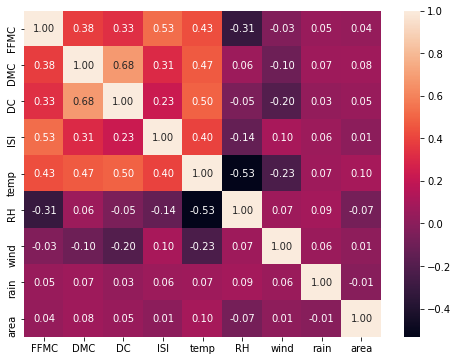

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(),annot=True,fmt='.2f')

DC and DMC are highly correlated with each other.

In [24]:
dataset.size_category.value_counts()

small    371
large    138
Name: size_category, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


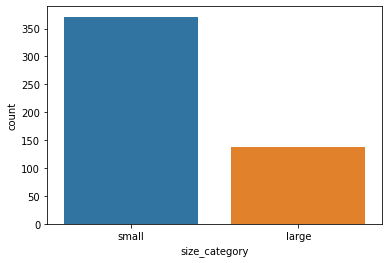

In [23]:
sns.countplot(dataset['size_category'])

We see that most of the small forest area are burnt.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


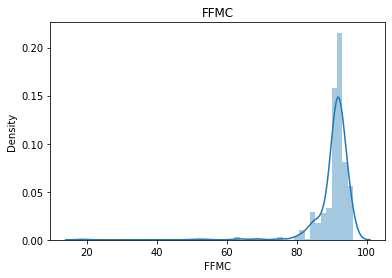

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


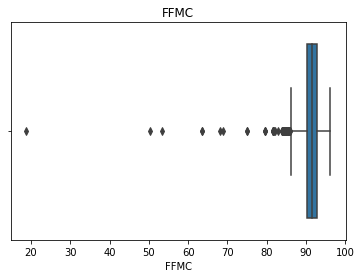

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


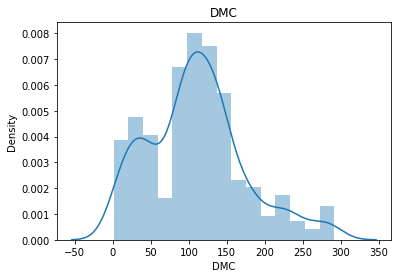

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


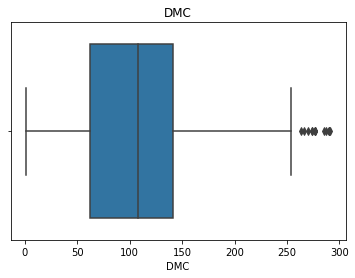

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


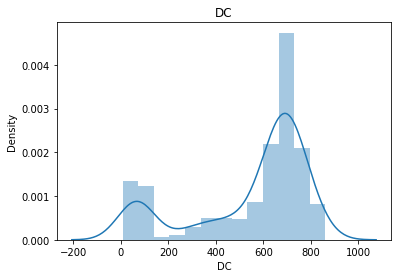

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


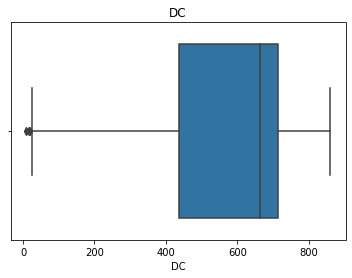

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


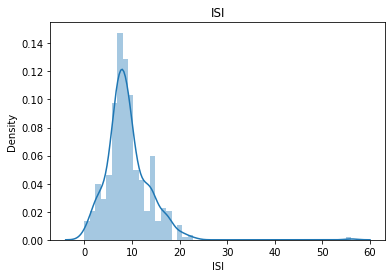

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


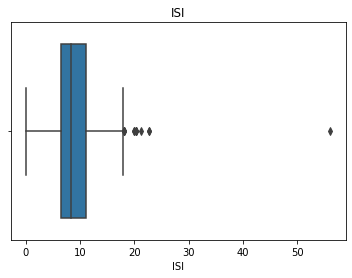

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


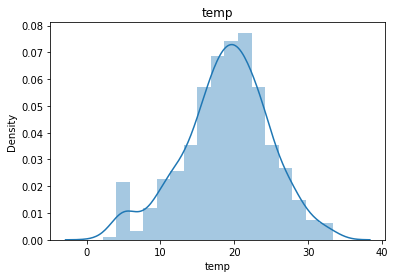

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


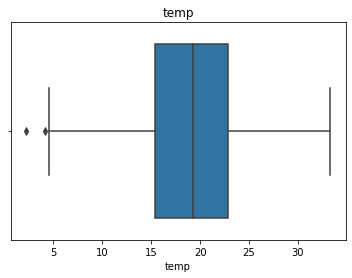

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


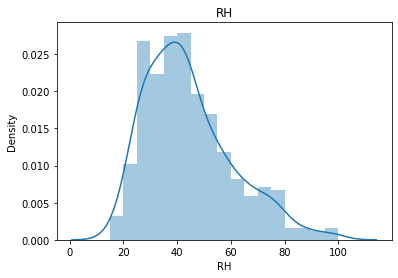

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


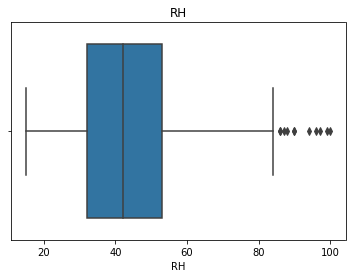

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


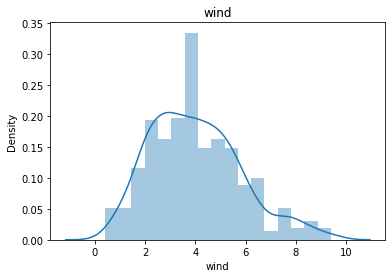

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


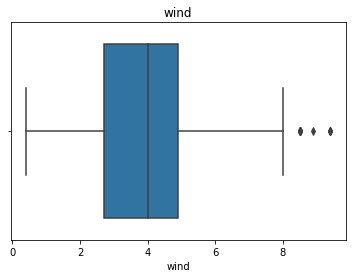

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


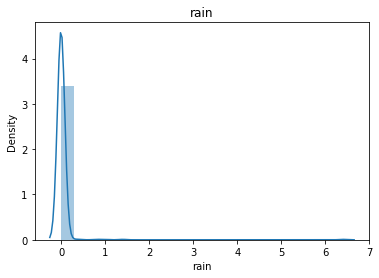

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


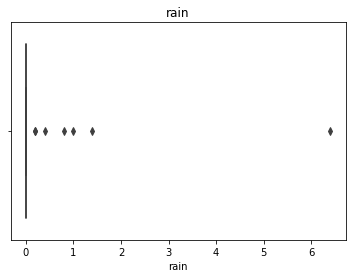

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


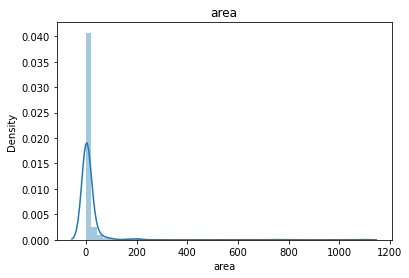

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


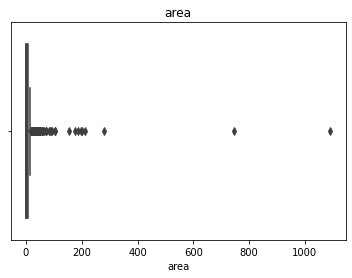

In [27]:
for col in dataset.columns[2:11]:
  sns.distplot(dataset[col])
  plt.title(col)
  plt.show()
  sns.boxplot(dataset[col])
  plt.title(col)
  plt.show()


Temperature follows Gaussian distribution whereas other attributes are right skewed with outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


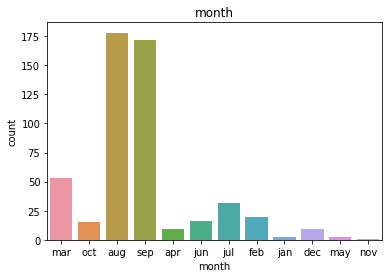

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


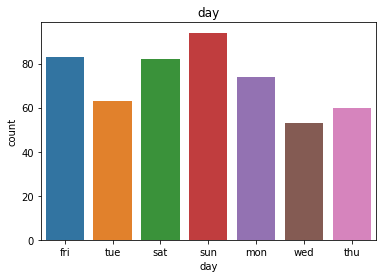

In [28]:
for col in ['month','day']:
  sns.countplot(dataset[col])
  plt.title(col)
  plt.show()

* Month: High number of the forest fires occur in the month of August and September
* Days: Friday,Saturday and Sunday see more forest fires than other days



In [29]:
from sklearn.preprocessing import LabelEncoder
cols = ['month', 'day','size_category']
# Encode labels of multiple columns at once
dataset[cols] = dataset[cols].apply(LabelEncoder().fit_transform)

In [30]:
dataset.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [47]:
dataset.to_csv('Forest_csv',header=False)

In [49]:
forest = np.loadtxt("/content/Forest_csv", delimiter=",")

In [57]:
X=forest[:,1:-1] #All values except index and size_category
y=forest[:,-1]

In [59]:
#Feature scaling
sc=StandardScaler()
X=sc.fit_transform(X)

In [40]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [68]:
#create model
def create_model():
  model=Sequential()
  model.add(Dense(10,input_dim=11,kernel_initializer='uniform',activation='relu'))
  model.add(Dense(6,kernel_initializer='uniform',activation='relu'))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

  adam=Adam(lr=0.01)
  model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
  return model

###Tuning of Hyperparameters :- Batch Size and Epochs

In [69]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=10, epochs=10, score=1.000, total=  14.2s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.2s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.951, total=   1.5s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.7s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.971, total=   1.2s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.9s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.941, total=   1.5s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   18.3s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.960, total=   1.5s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.8s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=1.000, total=   3.4s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   23.2s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.980, total=   2.3s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   25.5s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.961, total=   2.4s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   27.9s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.961, total=   2.4s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   30.3s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.950, total=   2.7s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=1.000, total=   5.9s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.980, total=   5.9s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.961, total=   6.0s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.941, total=   3.9s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.970, total=   6.0s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=1.000, total=   1.2s
[CV] batch_size=20, epochs=10 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.9min finished


In [74]:
#Summarise the results
print('Best score: {} using best parameters {}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
  print('{},{} with {}:'.format(mean,stdev,param))

Best score: 0.9705299973487854 using best parameters {'batch_size': 10, 'epochs': 100}
0.9646282196044922,0.020203187094652568 with {'batch_size': 10, 'epochs': 10}:
0.9704911708831787,0.017647044418268143 with {'batch_size': 10, 'epochs': 50}:
0.9705299973487854,0.019608187935476855 with {'batch_size': 10, 'epochs': 100}:
0.9135313510894776,0.05666724846859107 with {'batch_size': 20, 'epochs': 10}:
0.9092020869255066,0.10989646394330514 with {'batch_size': 20, 'epochs': 50}:
0.966511356830597,0.027706685310100943 with {'batch_size': 20, 'epochs': 100}:
0.7761793851852417,0.1680164868116735 with {'batch_size': 40, 'epochs': 10}:
0.9704717516899108,0.02163948222501767 with {'batch_size': 40, 'epochs': 50}:
0.9645699739456177,0.026187709620553855 with {'batch_size': 40, 'epochs': 100}:


###Tuning of Hyperparameters:- Learning rate and Drop out rate

In [82]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 11,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(6,input_dim = 8,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV]  dropout_rate=0.0, learning_rate=0.001, score=1.000, total=   1.0s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.765, total=   1.1s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.510, total=   1.5s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.676, total=   1.1s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.7s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.703, total=   1.1s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.8s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=1.000, total=   1.0s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.8s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.873, total=   1.0s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    7.9s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.765, total=   1.0s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    8.9s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.863, total=   1.1s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   10.0s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.871, total=   1.1s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=1.000, total=   1.1s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.892, total=   1.1s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.863, total=   1.1s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.873, total=   1.4s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.901, total=   1.1s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV]  dropout_rate=0.1, learning_rate=0.001, score=1.000, total=   1.1s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV] 

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   50.6s finished


In [83]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.905688214302063, using {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7307901501655578,0.15886074403422376 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.8742574214935303,0.07477567463544507 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.905688214302063,0.04907586222894466 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7307901501655578,0.15886074403422376 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.7977674245834351,0.16248416567231636 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.8468064308166504,0.10250082322725684 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.728809940814972,0.1592563941055272 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.7839642882347106,0.1582414592883776 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7702776193618774,0.15982950165595472 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


#### Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [84]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(12,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(10,input_dim = 12,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV]  activation_function=softmax, init=uniform, score=1.000, total=   1.6s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.765, total=   1.1s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.510, total=   1.1s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.676, total=   1.1s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.9s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.693, total=   1.1s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.0s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=1.000, total=   1.1s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.1s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.765, total=   1.1s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    8.3s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.510, total=   1.1s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    9.4s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.676, total=   1.1s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   10.5s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.693, total=   1.1s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=1.000, total=   1.5s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.765, total=   1.2s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.510, total=   1.1s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.676, total=   1.1s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.693, total=   1.1s
[CV] activation_function=relu, init=uniform ..........................
[CV]  activation_function=relu, init=uniform, score=1.000, total=   1.1s
[CV] activation_function=relu, init=uniform .................

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.2min finished


In [85]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7562997579574585, using {'activation_function': 'tanh', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'softmax', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'softmax', 'init': 'zero'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'relu', 'init': 'uniform'}
0.7307901501655578,0.15886074403422376 with: {'activation_function': 'relu', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'relu', 'init': 'zero'}
0.7543389797210693,0.13286848516618793 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.7562997579574585,0.13191851411491873 with: {'activation_function': 'tanh', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'tanh', 'init': 'zero'}
0.7543389797210693,0.13286848516618793 with: {'activation_function':

#### Tuning of Hyperparameter :-Number of Neurons in activation layer

In [86]:
  # Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ................ neuron1=4, neuron2=2, score=1.000, total=   1.1s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.765, total=   1.1s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.539, total=   1.1s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.3s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.676, total=   1.1s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.3s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.713, total=   1.6s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.9s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=1.000, total=   1.1s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.0s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.765, total=   1.1s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    8.1s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.529, total=   1.1s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    9.2s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.676, total=   1.1s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   10.3s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.723, total=   1.1s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=1.000, total=   1.0s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.765, total=   1.1s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.549, total=   1.1s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.676, total=   1.1s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.733, total=   1.1s
[CV] neuron1=8, neuron2=2 ............................................
[CV] ................ neuron1=8, neuron2=2, score=1.000, total=   1.5s
[CV] neuron1=8, neuron2=2 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   51.0s finished


In [87]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7543583869934082, using {'neuron1': 16, 'neuron2': 8}
0.7386526942253113,0.1505241508046081 with: {'neuron1': 4, 'neuron2': 2}
0.7386721134185791,0.1528932562718846 with: {'neuron1': 4, 'neuron2': 4}
0.7445738792419434,0.14742384311472911 with: {'neuron1': 4, 'neuron2': 8}
0.7464958429336548,0.1421199036900338 with: {'neuron1': 8, 'neuron2': 2}
0.7465152502059936,0.1442264008989306 with: {'neuron1': 8, 'neuron2': 4}
0.748456621170044,0.1396994086855667 with: {'neuron1': 8, 'neuron2': 8}
0.7445350527763367,0.1446062616233392 with: {'neuron1': 16, 'neuron2': 2}
0.7543389797210693,0.13286848516618793 with: {'neuron1': 16, 'neuron2': 4}
0.7543583869934082,0.1345478731151712 with: {'neuron1': 16, 'neuron2': 8}


#### Training model with optimum values of Hyperparameters

In [96]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 11,kernel_initializer = 'normal',activation = 'tanh'))
    model.add(Dropout(0.0))
    model.add(Dense(8,input_dim = 16,kernel_initializer = 'normal',activation = 'tanh'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.1) 
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Fitting the model

history=model.fit(X,y)

# Predicting using trained model

y_predict = model.predict(X)

# Printing the metrics
print(accuracy_score(y,y_predict))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


0.9587426326129665


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [97]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


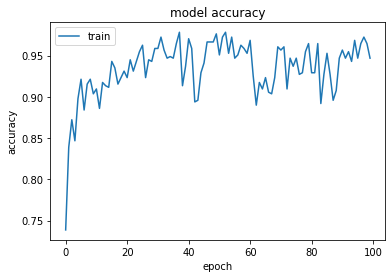

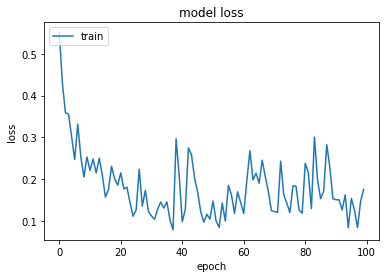

In [99]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [102]:
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=30, random_state=7)
results = cross_val_score(model, X, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Results: 0.93 (0.08) MSE
